In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("/content/sample_data/dataset2.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


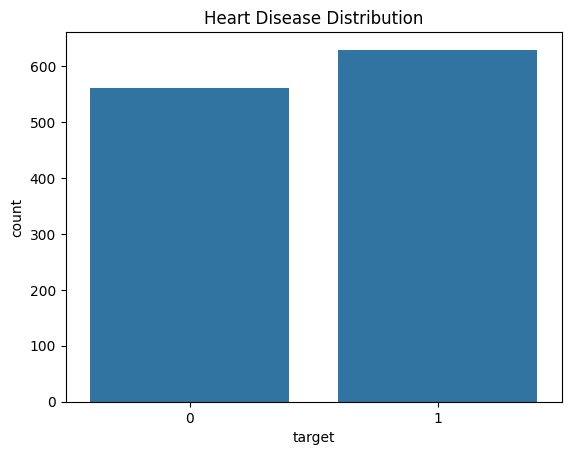

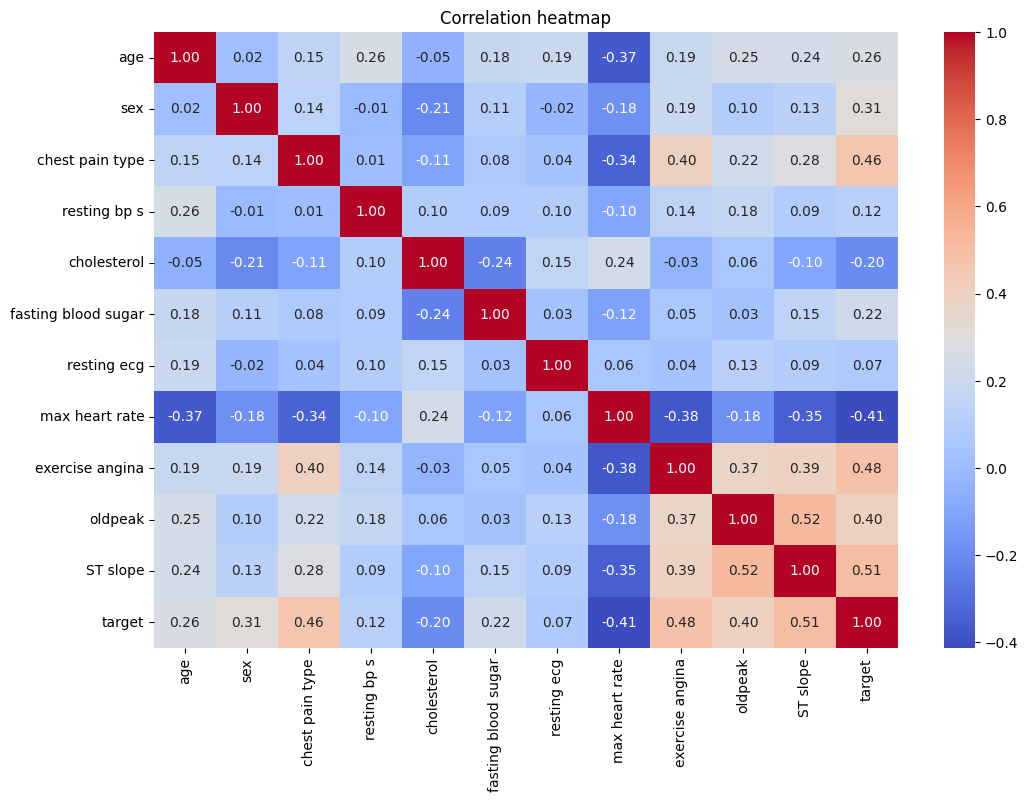

In [5]:
# EDA
df.isnull().sum()

# Target variable distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [9]:
# Data Preprocessing
df = df.drop_duplicates()
df = df.dropna()

# Feature and target split
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy score: 0.8478260869565217


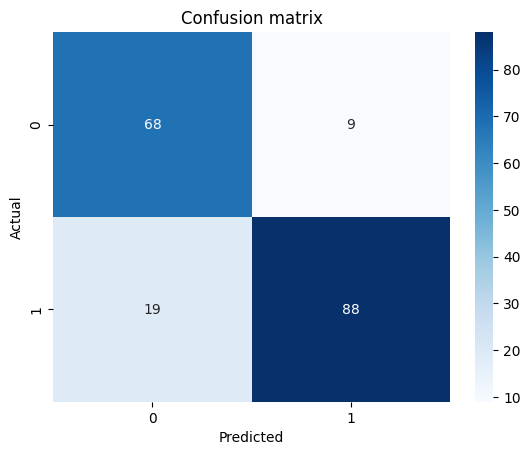

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [13]:
# Model Evaluation
print("Accuracy score:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

In [19]:
# Testing the system with sample input data

sample_original = pd.DataFrame({
    'age': [63],
    'sex': [1],
    'resting blood pressure': [145],
    'cholesterol': [233],
    'fasting blood sugar': [1],
    'max heart rate': [150],
    'exercise angina': [0],
    'oldpeak': [2.3],
    'number of major vessels': [0],
    'chest pain type': [3],     # categorical
    'ST slope': [2],            # categorical
    'thal': [3]                 # categorical
})

sample_processed = pd.get_dummies(sample_original, columns=['chest pain type', 'thal', 'ST slope'], drop_first=True)
sample_processed = sample_processed.reindex(columns=X.columns, fill_value=0)
sample_scaled = scaler.transform(sample_processed)

prediction = model.predict(sample_scaled)

# Predict probability
proba = model.predict_proba(sample_scaled)[0]
print(f"Probability of No Heart Disease: {proba[0]:.2f}")
print(f"Probability of Heart Disease: {proba[1]:.2f}")

Probability of No Heart Disease: 0.98
Probability of Heart Disease: 0.02
